<a href="https://colab.research.google.com/github/SLCFLAB/IBK2023/blob/main/05_timeseries_decomposition_x13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://github.com/DiploDatos/AnalisisSeriesTemporales/blob/master/Tutorial05%20Seasonal%20ARIMA.ipynb and https://github.com/mscharth/forecasting/blob/master/Tutorial14%20Seasonal%20ARIMA.ipynb


### How to run x13 on colab [SLCF]

1. First download Linux/Unix executable with ASCII text file output [3.6 MB] on https://www.census.gov/data/software/x13as/x13as-archive.html.
2. upload x13as_ascii-v1-1-b60.tar.gz with fileupload.
3. execute below codes

In [12]:
%%bash
X13AS_DIR=x13asall
X13AS_TARFILE=x13as_ascii-v1-1-b60.tar.gz
mkdir -p x13asall
tar -C $X13AS_DIR -xvf $X13AS_TARFILE
mv $X13AS_DIR/x13as .

./x13as/
./x13as/x13as_ascii
./x13as/testairline.spc
./x13as/docs/
./x13as/docs/docx13as.pdf
./x13as/docs/qrefX13ASunix.pdf


In [13]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [14]:
# Plot settings
sns.set_context('notebook')
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'

In [15]:
# Predefined plots

# Time series plot
def ts_plot(y, color=red):
    fig, ax= plt.subplots(figsize=(9,6))
    y.plot(color=color, ax=ax)
    ax.set_xlabel('')
    ax.set_xticks([], minor=True)
    sns.despine()
    return fig, ax

# ACF and PACF plots
def acf_pacf_plot(y):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    sm.graphics.tsa.plot_acf(y, lags=40, ax=ax[0])
    sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax[1])
    sns.despine()
    fig.tight_layout()
    return fig, ax

#Histogram
def hist(y):
    fig, ax= plt.subplots(figsize=(8,5))
    sns.distplot(y, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

##Data: co2

In [16]:
co2 = [
    315.58,
    316.39,
    316.79,
    317.82,
    318.39,
    318.22,
    316.68,
    315.01,
    314.02,
    313.55,
    315.02,
    315.75,
    316.52,
    317.10,
    317.79,
    319.22,
    320.08,
    319.70,
    318.27,
    315.99,
    314.24,
    314.05,
    315.05,
    316.23,
    316.92,
    317.76,
    318.54,
    319.49,
    320.64,
    319.85,
    318.70,
    316.96,
    315.17,
    315.47,
    316.19,
    317.17,
    318.12,
    318.72,
    319.79,
    320.68,
    321.28,
    320.89,
    319.79,
    317.56,
    316.46,
    315.59,
    316.85,
    317.87,
    318.87,
    319.25,
    320.13,
    321.49,
    322.34,
    321.62,
    319.85,
    317.87,
    316.36,
    316.24,
    317.13,
    318.46,
    319.57,
    320.23,
    320.89,
    321.54,
    322.20,
    321.90,
    320.42,
    318.60,
    316.73,
    317.15,
    317.94,
    318.91,
    319.73,
    320.78,
    321.23,
    322.49,
    322.59,
    322.35,
    321.61,
    319.24,
    318.23,
    317.76,
    319.36,
    319.50,
    320.35,
    321.40,
    322.22,
    323.45,
    323.80,
    323.50,
    322.16,
    320.09,
    318.26,
    317.66,
    319.47,
    320.70,
    322.06,
    322.23,
    322.78,
    324.10,
    324.63,
    323.79,
    322.34,
    320.73,
    319.00,
    318.99,
    320.41,
    321.68,
    322.30,
    322.89,
    323.59,
    324.65,
    325.30,
    325.15,
    323.88,
    321.80,
    319.99,
    319.86,
    320.88,
    322.36,
    323.59,
    324.23,
    325.34,
    326.33,
    327.03,
    326.24,
    325.39,
    323.16,
    321.87,
    321.31,
    322.34,
    323.74,
    324.61,
    325.58,
    326.55,
    327.81,
    327.82,
    327.53,
    326.29,
    324.66,
    323.12,
    323.09,
    324.01,
    325.10,
    326.12,
    326.62,
    327.16,
    327.94,
    329.15,
    328.79,
    327.53,
    325.65,
    323.60,
    323.78,
    325.13,
    326.26,
    326.93,
    327.84,
    327.96,
    329.93,
    330.25,
    329.24,
    328.13,
    326.42,
    324.97,
    325.29,
    326.56,
    327.73,
    328.73,
    329.70,
    330.46,
    331.70,
    332.66,
    332.22,
    331.02,
    329.39,
    327.58,
    327.27,
    328.30,
    328.81,
    329.44,
    330.89,
    331.62,
    332.85,
    333.29,
    332.44,
    331.35,
    329.58,
    327.58,
    327.55,
    328.56,
    329.73,
    330.45,
    330.98,
    331.63,
    332.88,
    333.63,
    333.53,
    331.90,
    330.08,
    328.59,
    328.31,
    329.44,
    330.64,
    331.62,
    332.45,
    333.36,
    334.46,
    334.84,
    334.29,
    333.04,
    330.88,
    329.23,
    328.83,
    330.18,
    331.50,
    332.80,
    333.22,
    334.54,
    335.82,
    336.45,
    335.97,
    334.65,
    332.40,
    331.28,
    330.73,
    332.05,
    333.54,
    334.65,
    335.06,
    336.32,
    337.39,
    337.66,
    337.56,
    336.24,
    334.39,
    332.43,
    332.22,
    333.61,
    334.78,
    335.88,
    336.43,
    337.61,
    338.53,
    339.06,
    338.92,
    337.39,
    335.72,
    333.64,
    333.65,
    335.07,
    336.53,
    337.82,
    338.19,
    339.89,
    340.56,
    341.22,
    340.92,
    339.26,
    337.27,
    335.66,
    335.54,
    336.71,
    337.79,
    338.79,
    340.06,
    340.93,
    342.02,
    342.65,
    341.80,
    340.01,
    337.94,
    336.17,
    336.28,
    337.76,
    339.05,
    340.18,
    341.04,
    342.16,
    343.01,
    343.64,
    342.91,
    341.72,
    339.52,
    337.75,
    337.68,
    339.14,
    340.37,
    341.32,
    342.45,
    343.05,
    344.91,
    345.77,
    345.30,
    343.98,
    342.41,
    339.89,
    340.03,
    341.19,
    342.87,
    343.74,
    344.55,
    345.28,
    347.00,
    347.37,
    346.74,
    345.36,
    343.19,
    340.97,
    341.20,
    342.76,
    343.96,
    344.82,
    345.82,
    347.24,
    348.09,
    348.66,
    347.90,
    346.27,
    344.21,
    342.88,
    342.58,
    343.99,
    345.31,
    345.98,
    346.72,
    347.63,
    349.24,
    349.83,
    349.10,
    347.52,
    345.43,
    344.48,
    343.89,
    345.29,
    346.54,
    347.66,
    348.07,
    349.12,
    350.55,
    351.34,
    350.80,
    349.10,
    347.54,
    346.20,
    346.20,
    347.44,
    348.67,
]
co2 = pd.Series(
    co2, index=pd.date_range("1-1-1959", periods=len(co2), freq="M"), name="CO2"
)
co2.describe()

count    348.000000
mean     330.123879
std       10.059747
min      313.550000
25%      321.302500
50%      328.820000
75%      338.002500
max      351.340000
Name: CO2, dtype: float64

In [17]:
data = co2
y=data
data.tail()

1987-08-31    347.54
1987-09-30    346.20
1987-10-31    346.20
1987-11-30    347.44
1987-12-31    348.67
Freq: M, Name: CO2, dtype: float64

We rescale the series to be in millions of rides, to facilitate the intepretation and avoid possible numerical problems.

##Exploratory Data Analysis

The next figure shows the time series.

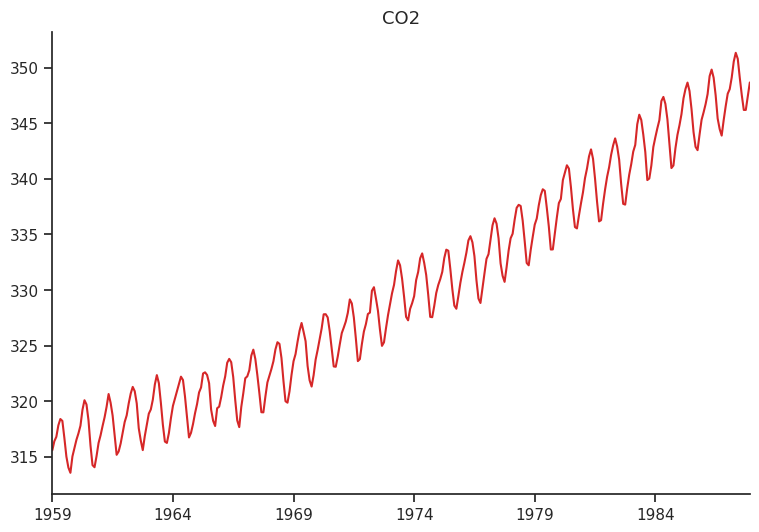

In [18]:
fig, ax= ts_plot(y)
ax.set_title('CO2', fontsize=13)
plt.show()

We conduct a X13-ARIMA-SEATS decomposition for the data.  The results show that the number of journeys on Sydney trains had a slightly negative trend until 2006, but has increased steadily with a roughly linear trend since then: the number of users grew by 22% in the last ten years of the data. The series has a clear seasonal pattern that seems to be slightly growing in size with the trend.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_components_x13(results, label=''):
    colours=['#D62728', '#FF7F0E', '#2CA02C', '#1F77B4']
    fig, ax = plt.subplots(2,2, figsize=(12,8))
    ax[0,0].plot(results.observed, color=colours[0], alpha=0.95)
    ax[0,0].set(ylabel=label, title='Observed')
    ax[0,1].plot(results.trend, color=colours[1], alpha=0.95)
    ax[0,1].set(title='Trend')
    ax[1,0].plot(results.observed/results.seasadj, color=colours[2],  alpha=0.95)
    ax[1,0].set(ylabel=label, title='Seasonal')
    ax[1,1].plot(results.irregular, color=colours[3],  alpha=0.95)
    ax[1,1].set(title='Irregular')
    sns.despine()
    fig.suptitle('Time series decomposition  (X-13 ARIMA-SEATS)', fontsize=13.5)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    return fig, ax

def plot_components_basic(results, label=''):
    colours=['#D62728', '#FF7F0E', '#2CA02C', '#1F77B4']
    fig, ax = plt.subplots(2,2, figsize=(12,8))
    ax[0,0].plot(results.observed, color=colours[0], alpha=0.95)
    ax[0,0].set(ylabel=label, title='Observed')
    ax[0,1].plot(results.trend, color=colours[1], alpha=0.95)
    ax[0,1].set(title='Trend')
    ax[1,0].plot(results.seasonal, color=colours[2],  alpha=0.95)
    ax[1,0].set(ylabel=label, title='Seasonal')
    ax[1,1].plot(results.resid, color=colours[3],  alpha=0.95)
    ax[1,1].set(title='Irregular')
    sns.despine()
    fig.suptitle('Time series decomposition  (X-13 ARIMA-SEATS)', fontsize=13.5)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    return fig, ax

def fanchart(y, forecast, intv1, intv2, intv3):
    assert type(y)==pd.core.series.Series, 'The time series must be a pandas series'
    assert type(forecast)==pd.core.series.Series, 'The forecast must be a pandas series'

    last=y.iloc[-1:]
    extended=last.append(forecast)

    with sns.axes_style('ticks'):
        fig, ax= plt.subplots(figsize=(8,5))
        y.plot(color='#D62728')
        extended.plot(color='black', alpha=0.4, label='Point forecast')
        ax.fill_between(extended.index, last.append(intv3.iloc[:,0]), last.append(intv3.iloc[:,1]), facecolor='#FAB8A4', lw=0)
        ax.fill_between(extended.index, last.append(intv2.iloc[:,0]), last.append(intv2.iloc[:,1]), facecolor='#F58671', lw=0)
        ax.fill_between(extended.index, last.append(intv1.iloc[:,0]), last.append(intv1.iloc[:,1]), facecolor='#F15749', lw=0)
        hold = ax.get_ylim()
        ax.fill_betweenx(ax.get_ylim(), extended.index[0], extended.index[-1], facecolor='grey', alpha=0.15)
        ax.set_ylim(hold)
    return fig, ax

def histogram(series):
    fig, ax= plt.subplots(figsize=(8,5))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': '#1F77B4'},
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

def qq_plot(residuals):
    fig, ax = plt.subplots(figsize=(8,5))
    pp = sm.ProbPlot(residuals, fit=True)
    qq = pp.qqplot(color='#1F77B4', alpha=0.8, ax=ax)
    a=ax.get_xlim()[0]
    b=ax.get_xlim()[1]
    ax.plot([a,b],[a,b], color='black', alpha=0.6)
    ax.set_xlim(a,b)
    ax.set_title('Normal Q-Q plot for the residuals', fontsize=12)
    return fig, ax

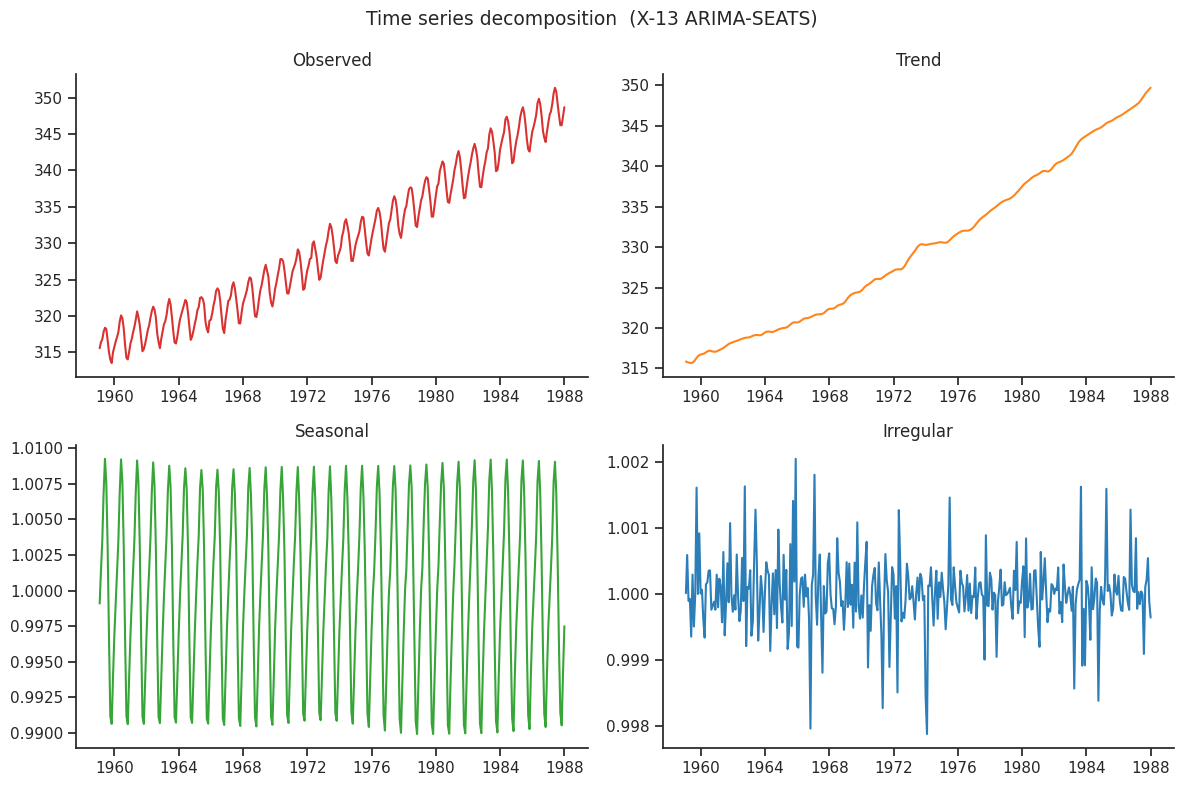

In [20]:
ts=y.copy()
decomposition=sm.tsa.x13_arima_analysis(ts,x12path='./x13as')
seasonal=decomposition.observed/decomposition.seasadj

plot_components_x13(decomposition)
plt.show()

To better understand the seasonal pattern, the next cell draws a seasonal plot. The number of journeys peaks in March, May and August, and is lowest during the summer months.

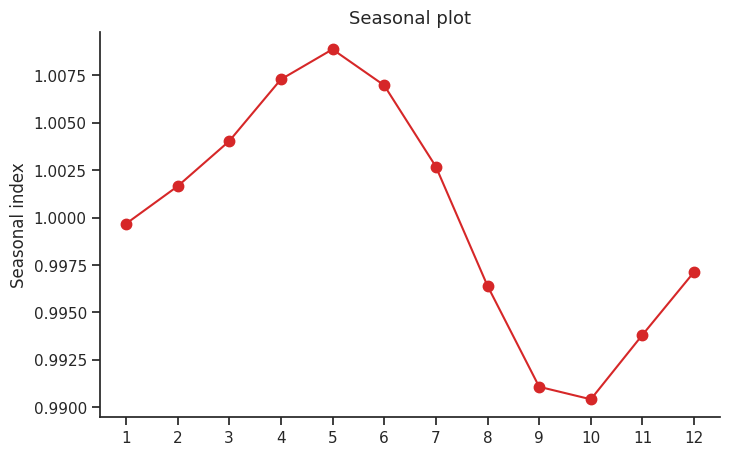

In [21]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(seasonal.groupby(seasonal.index.month).mean(), color=red, marker='.', markersize=15)
ax.set_xlim(0.5,12.5)
ax.set_xticks(np.arange(1,13))
ax.set_ylabel('Seasonal index')
ax.set_title('Seasonal plot', fontsize=13)
sns.despine()
plt.show()

It is useful to save the help X13-ARIMA output for reference.

In [ ]:
f=open('x13results.txt', mode='w+')
f.write(decomposition.results)
f.close()

##ARIMA



###Identification

To identify an appropriate ARIMA specification for the series, we start by creating a data frame to store the first differenced, seasonally differenced, and first and seasonally differenced series.

In [ ]:
df=pd.DataFrame(y.copy())
df.columns.values[0]='original'
df['first_diff']=y-y.shift(1)
df['seasonal_diff']=y-y.shift(12)
df['diff']=df['first_diff']-df['first_diff'].shift(12)
df=df.dropna()
df.tail().round(3)

,original,first_diff,seasonal_diff,diff
1987-08-31,347.54,-1.56,2.11,0.53
1987-09-30,346.20,-1.34,1.72,-0.39
1987-10-31,346.20,0.00,2.31,0.59
1987-11-30,347.44,1.24,2.15,-0.16
1987-12-31,348.67,1.23,2.13,-0.02


Taking the first difference reveals a slow decay in ACF at the seasonal lags, suggesting the need for seasonal difference to  stationarity.

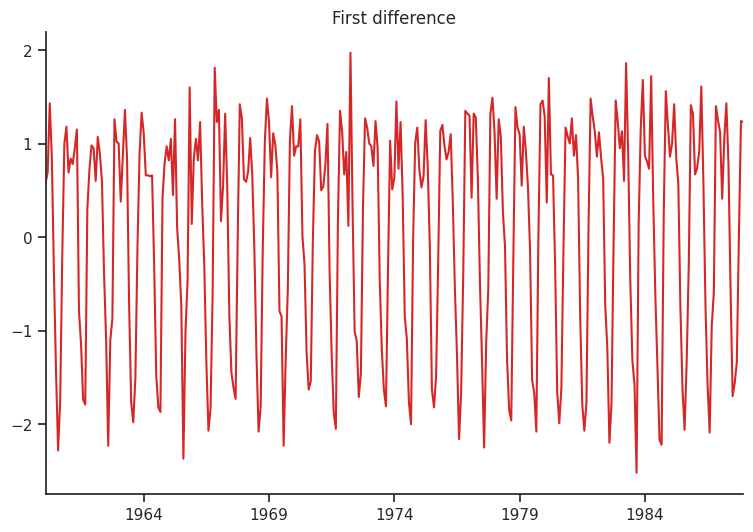

In [ ]:
ts_plot(df['first_diff'])
plt.title('First difference')
plt.show()

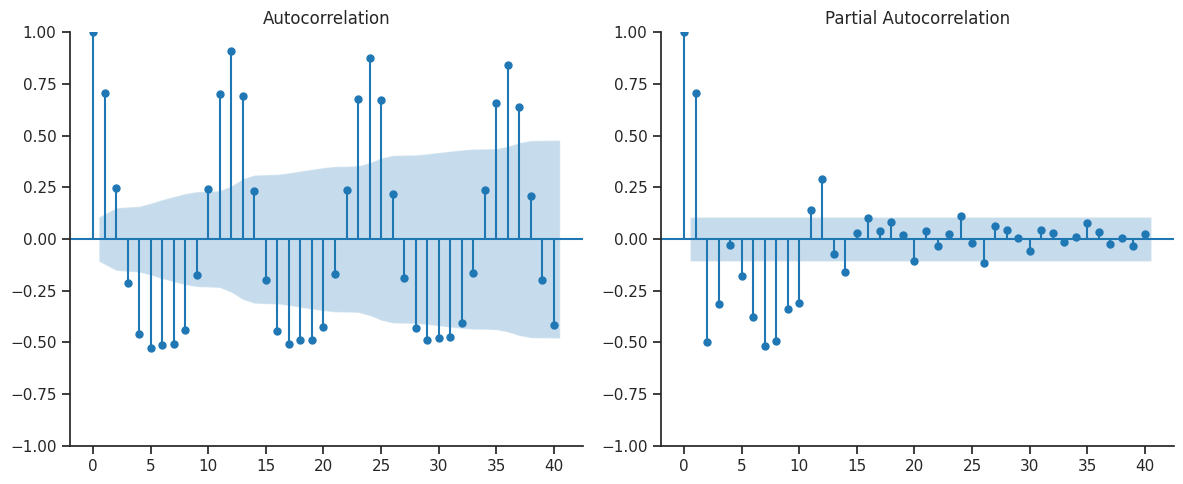

In [ ]:
acf_pacf_plot(df['first_diff'])
plt.show()

Taking only the seasonal difference leads to a still clearly nonstationary series, confirming the need for both transformations.

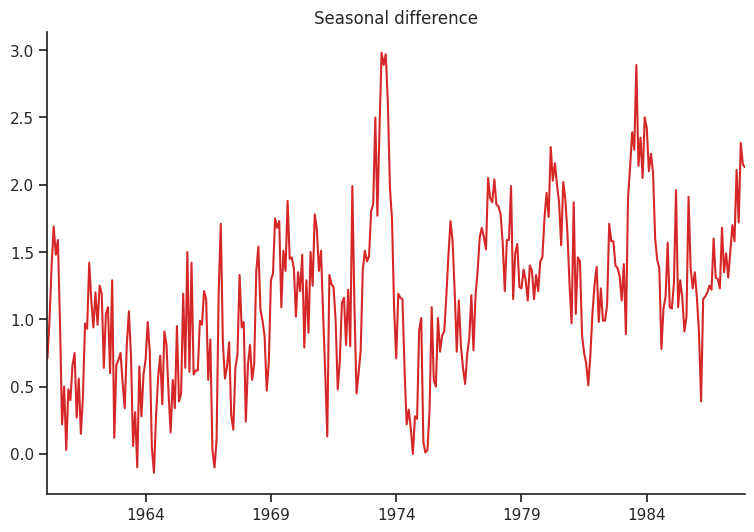

In [ ]:
ts_plot(df['seasonal_diff'])
plt.title('Seasonal difference')
plt.show()

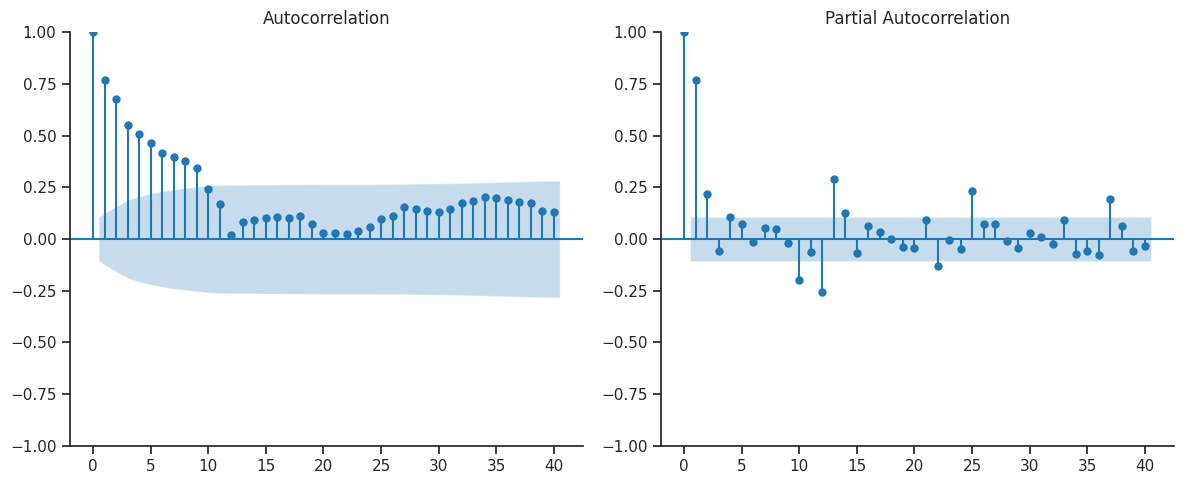

In [ ]:
acf_pacf_plot(df['seasonal_diff'])
plt.show()

The next figure shows the first and seasonally differenced series, followed by the ACF and PACF plots. The ACF and PACF plots suggest the an AR(2) model: since the autocorrelations decrease gradually, while the partial autocorrelations display a clear cut-off after lag 2.

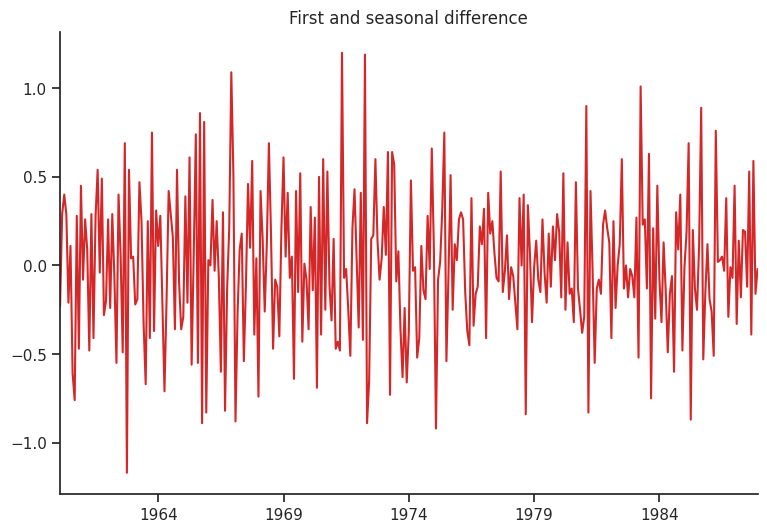

In [ ]:
ts_plot(df['diff']) # first and seasonal difference
plt.title('First and seasonal difference')
plt.show()

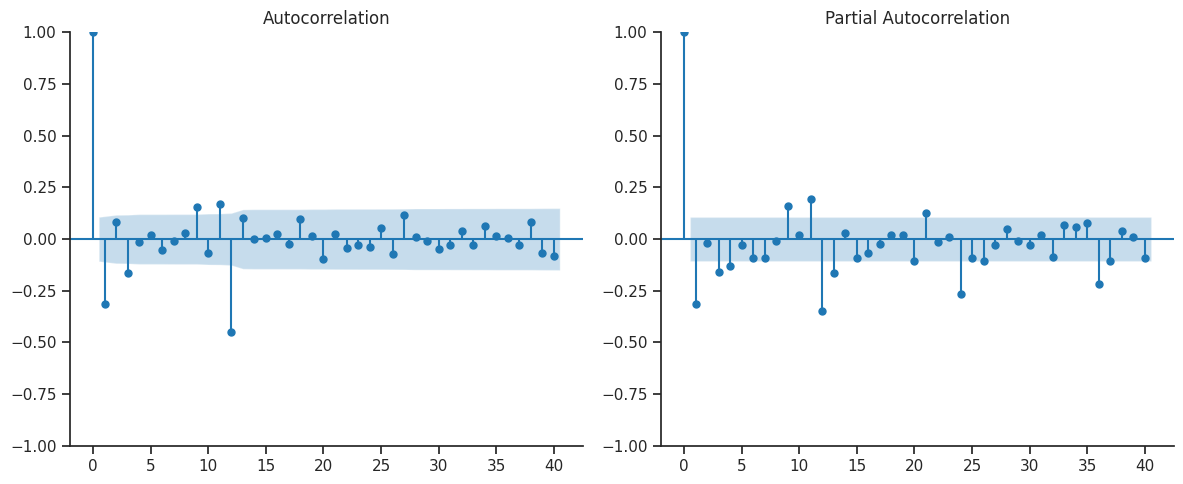

In [ ]:
acf_pacf_plot(df['diff'])
plt.show()

No seasonal AR or MA pattern is easily discernible from the ACF and PACFs plots above. Hence, I fit an AR(2) to model to the first and seasonally differenced series and examine the residuals for the remaining autocorrelations. The ACF and PACF plots for the residulal series seem to be consistent with a seasonal MA(1) model, due to a significant autocorrelation at lag 12 and significant partial autocorrelations at lags 12 and 24.  

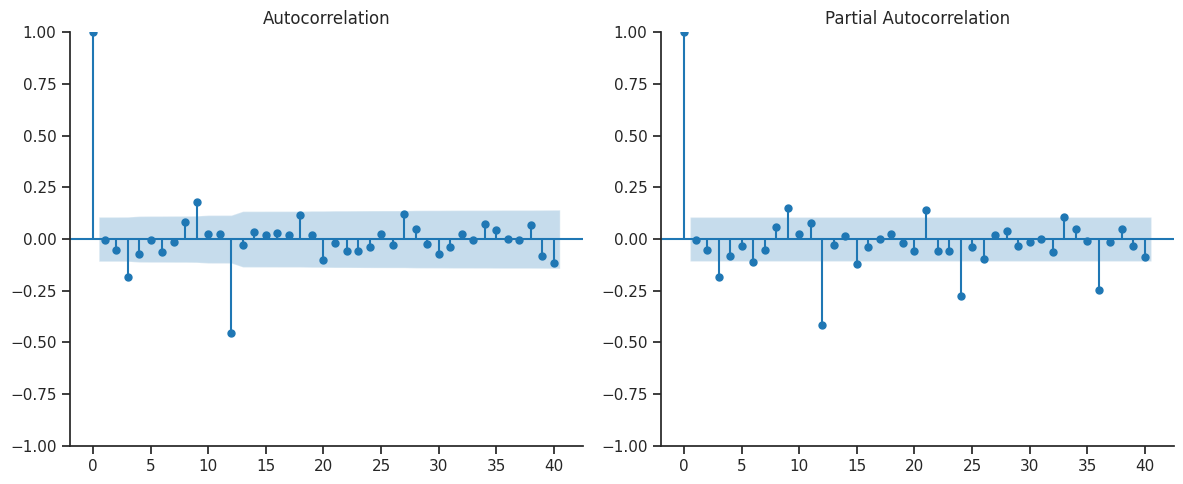

In [ ]:
arima = sm.tsa.ARIMA(df['diff'], order=(2, 0, 0)).fit()
acf_pacf_plot(arima.resid)
plt.show()

###Automatic selection

We can also conduct automatic ARIMA order selection based on the X13 ARIMA decomposition software, which is in turn based on the AIC. The automatic selection procedure confirms our choice based on the analysis of the ACF and PACF plots. In practice, it is important to use both the visual and automatic approaches and compare the results.

In [ ]:
results=sm.tsa.x13_arima_select_order(y,x12path='./x13as')
print(results.order) # non-seasonal part
print(results.sorder) # seasonal part

(0, 1, 1)
(0, 1, 1)


##Estimation

In [ ]:
sarima=sm.tsa.statespace.SARIMAX(y,  order=(2, 1, 0), seasonal_order=(0, 1, 1, 12)).fit()
print(sarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  CO2   No. Observations:                  348
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -68.206
Date:                              Wed, 01 Nov 2023   AIC                            144.413
Time:                                      14:31:58   BIC                            159.669
Sample:                                  01-31-1959   HQIC                           150.495
                                       - 12-31-1987                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3106      0.052     -5.981      0.000      -0.412      -0.209
ar.L2         -0.04

###Diagnostics


In [ ]:
resid=sarima.resid[13:] # the first 13 residuals are inialisation ones

Below are the residual plot, ACF and PACF for the ARIMA(2,1,0)(0,1,1) model. Therea are no apparent patterns in these plots, so that model seems to adequately capture time series dependence in the date.

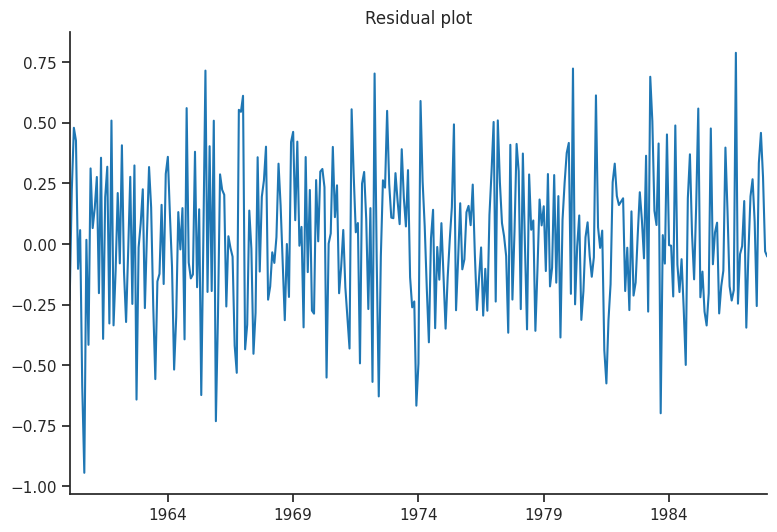

In [ ]:
ts_plot(resid, color=blue)
plt.title('Residual plot')
plt.show()

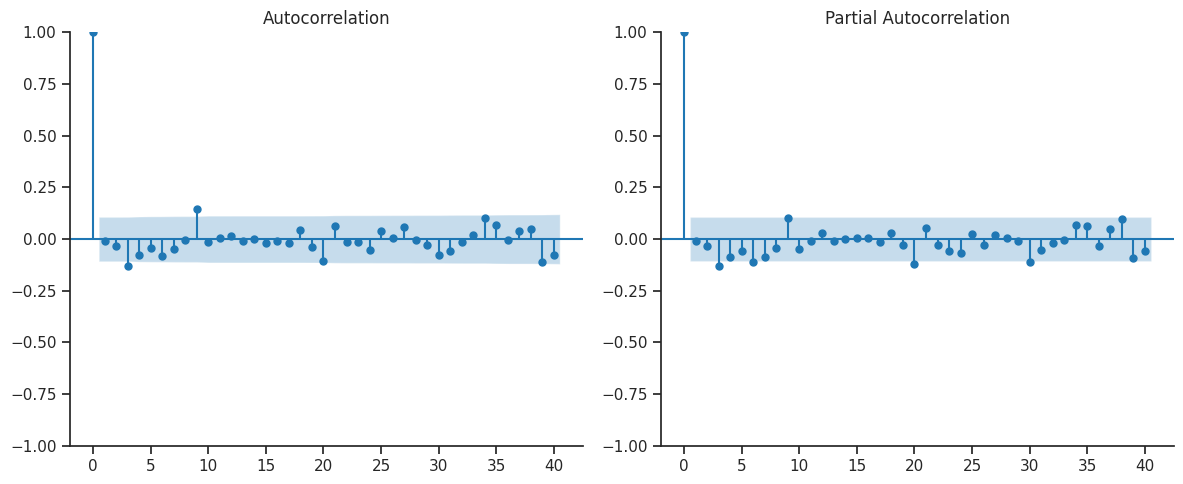

In [ ]:
acf_pacf_plot(resid)
plt.show()

The histogram of the residuals is consistent with a normal or near normal distribution.

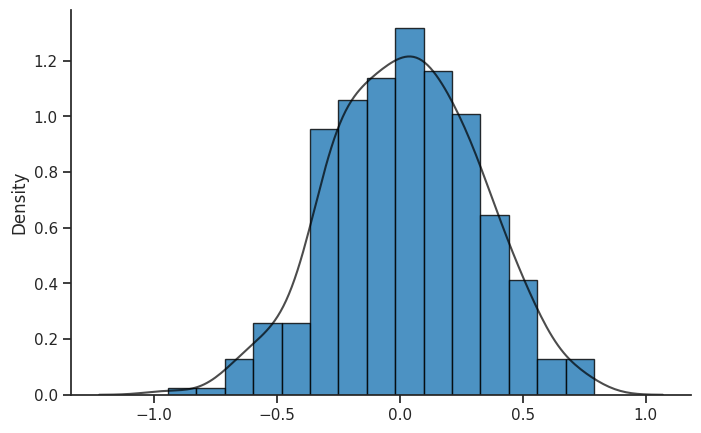

In [ ]:
hist(resid)
plt.show()

This part of the model output gives further information. The distribution of the residuals is approximately symmetric and displays near Gaussian sample kurtosis, such that we do not reject the null hypothesis of normality.

In [ ]:
sarima.summary().tables[2]

Ljung-Box (L1) (Q):,0.04,Jarque-Bera (JB):,1.05
Prob(Q):,0.84,Prob(JB):,0.59
Heteroskedasticity (H):,0.88,Skew:,-0.00
Prob(H) (two-sided):,0.48,Kurtosis:,2.73


The output also shows hypothesis tests for no serial correlation and constant variance (both of which we do not reject).